## Final Project Submission

Please fill out:
* Student name: **Dennis Trimarchi**
* Student pace: **full time**
* Scheduled project review date/time: **Not yet scheduled**
* Instructor name: **Rafael Cassaro**
* Blog post URL: **Not yet created**


This file:
**Student_4_Making Plots.jpynb**


# Playing around with different plots

In [84]:
#Datarames and Computation
import numpy as np
import pandas as pd

#Visualizations
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
#contexts available: poster, paper, talk, notebook
sns.set_context('talk')

#PICKLE for saving objects
import pickle

#### Read in DataFrame from pickle file

In [6]:
with open('data_plot.pickle','rb') as f:
    data = pickle.load(f)

In [7]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,zip_981,has_basement,built_last_20_yrs,dist_from_Bellvue
0,221900.0,3,1.0,1180,5650,1.0,0,3,7,1180,...,1955.0,98178,47.5112,-122.257,1340,5650,1,0,0,9.656240
1,538000.0,3,2.0,2570,7242,2.0,0,3,7,2170,...,1991.0,98125,47.7210,-122.319,1690,7639,1,1,0,8.994609
2,180000.0,2,1.0,770,10000,1.0,0,3,6,770,...,1933.0,98028,47.7379,-122.233,2720,8062,0,0,0,7.496435
3,604000.0,4,3.0,1960,5000,1.0,0,5,7,1050,...,1965.0,98136,47.5208,-122.393,1360,5000,1,1,0,13.177219
4,510000.0,3,2.0,1680,8080,1.0,0,3,8,1680,...,1987.0,98074,47.6168,-122.045,1800,7503,0,0,0,6.002734


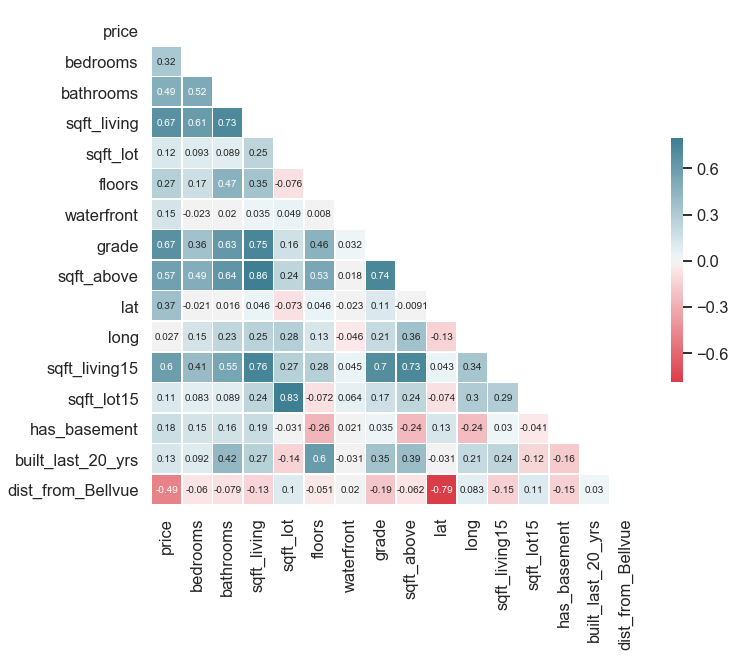

In [24]:
sns.set(style="white")
sns.set_context('talk')


# Compute the correlation matrix
corr = data.drop(['zipcode','zip_981','condition','yr_built','yr_renovated'],axis=1).corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(10, 220, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.8, center=0,
            square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .5}, annot_kws={"size": 10})


#ax.invert_xaxis()
#ax.xaxis.tick_top()
#plt.xticks(rotation=90)

Text(0.5, 1.0, 'Price by Geographical Location')

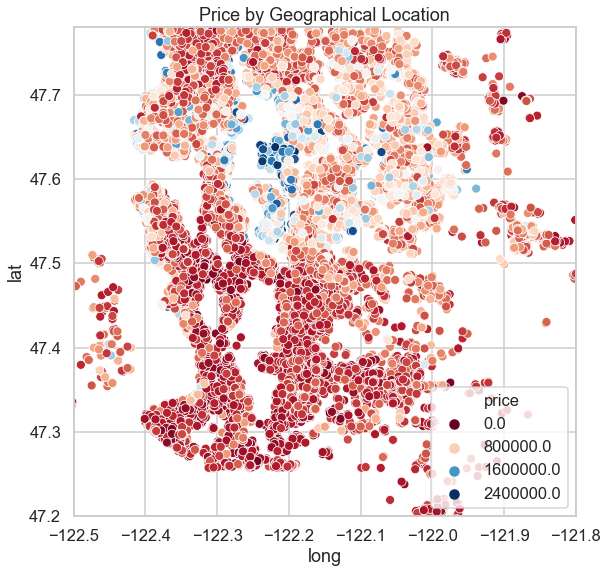

In [69]:
#Plotting Lat vs Long to get a map of homes. The color of the dots represent price.
sns.set_style('whitegrid')
plt.figure(figsize=(9,9))
sns.scatterplot(data['long'], data['lat'], hue=data['price'], palette='RdBu')
plt.legend(loc='lower right')
plt.ylim(47.2, 47.78)
plt.xlim(-122.5, -121.8)
plt.title("Price by Geographical Location")

Text(0.5, 1.0, 'Price and Grade')

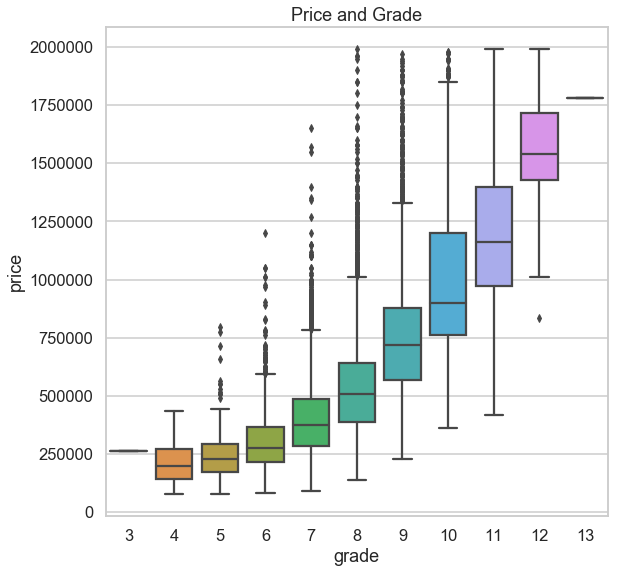

In [49]:
#Box plot Price vs Grade
sns.set_style('whitegrid')
plt.figure(figsize=(9,9))
prices_grouped = data.groupby('grade')['price'].mean()
sns.boxplot(data['grade'], data['price'])
#sns.scatterplot(data['sqft_living'], data['grade'], hue=data['price'], palette='GnBu')
#plt.legend(loc='lower right')
plt.title("Price and Grade")

Text(0.5, 1.0, 'Price vs Living Space, color showing location')

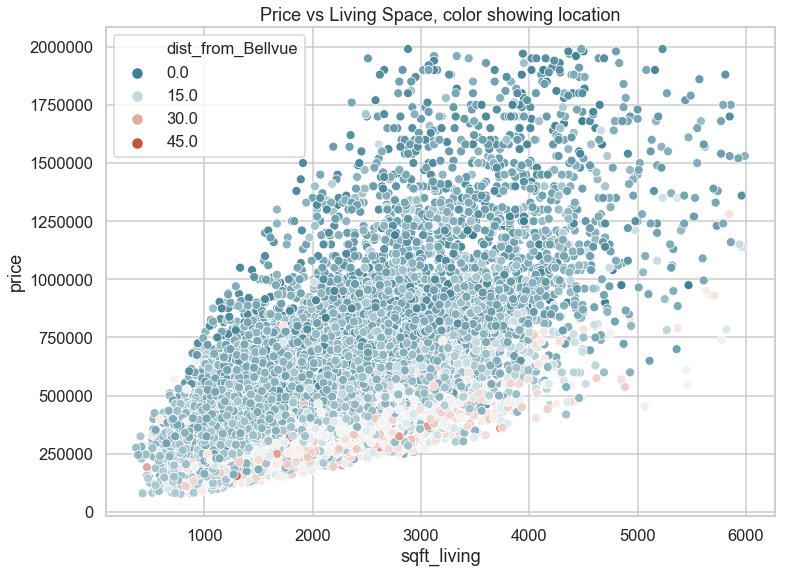

In [71]:
#Scatter sqft_living vs price
sns.set_style('whitegrid')
plt.figure(figsize=(12,9))
cmap = sns.diverging_palette(220, 20, n=7, as_cmap=True)
#palette='cubehelix'
sns.scatterplot(data['sqft_living'], data['price'], hue=data['dist_from_Bellvue'], palette=cmap)
plt.legend(loc='upper left')
plt.title("Price vs Living Space, color showing location")

In [83]:
data.groupby('grade')['price'].mean()

grade
3     2.620000e+05
4     2.120019e+05
5     2.478793e+05
6     3.014908e+05
7     4.015037e+05
8     5.409482e+05
9     7.623690e+05
10    9.937233e+05
11    1.209595e+06
12    1.541477e+06
13    1.780000e+06
Name: price, dtype: float64

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Waterfront vs Price')

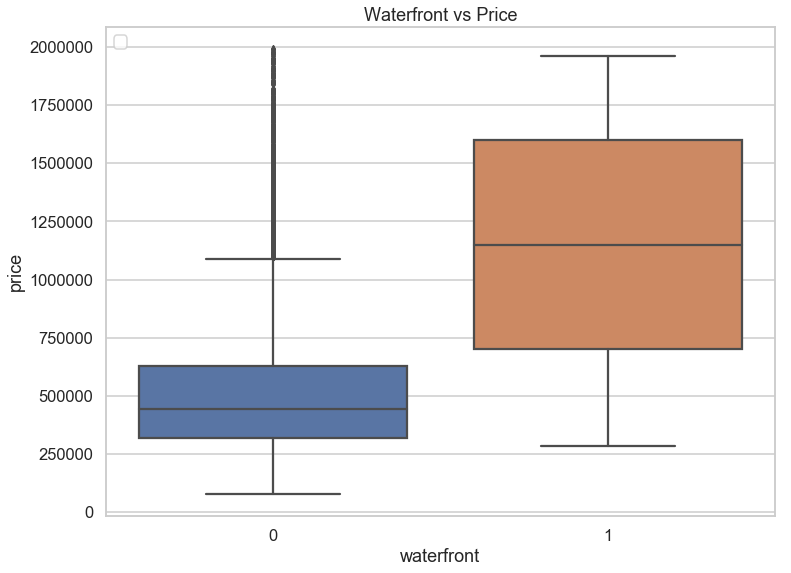

In [76]:
#Scatter sqft_living vs price
sns.set_style('whitegrid')
plt.figure(figsize=(12,9))
cmap = sns.diverging_palette(220, 20, n=7, as_cmap=True)
#palette='cubehelix'
sns.boxplot(data['waterfront'], data['price'])
plt.legend(loc='upper left')
plt.title("Waterfront vs Price")

Text(0.5, 1.0, 'Price vs Lot Size')

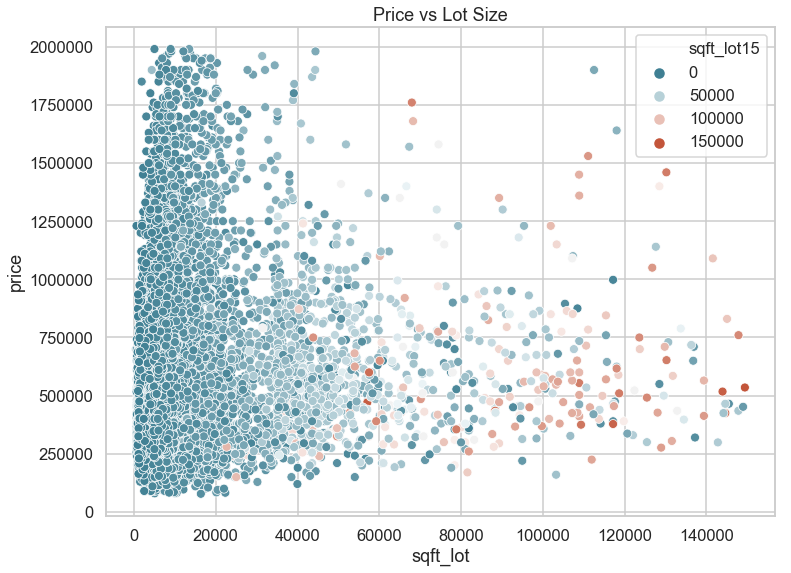

In [82]:
#More scatterplots
sns.set_style('whitegrid')
plt.figure(figsize=(12,9))
cmap = sns.diverging_palette(220, 20, n=7, as_cmap=True)
#palette='cubehelix'
sns.scatterplot(data['sqft_lot'], data['price'], hue=data['sqft_lot15'], palette=cmap)
plt.legend(loc='upper right')
plt.title("Price vs Lot Size")